In [79]:
import math
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy.stats import t, sem
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm


In [80]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [82]:
train.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [83]:
set(train.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [6]:
train.shape

(1460, 81)

In [7]:
pd.isnull(train).sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
train=train.dropna(1)

In [9]:
pd.isnull(train).sum().sort_values(ascending=False).head(3)

SalePrice      0
OverallQual    0
BsmtUnfSF      0
dtype: int64

In [10]:
train=train.sort_values(by=['SalePrice'], ascending=True)
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,115,0,0,0,0,11,2009,WD,Abnorml,34900
916,917,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Abnorml,35311
968,969,50,RM,5925,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Abnorml,37900
533,534,20,RL,5000,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,1,2007,WD,Normal,39300
30,31,70,C (all),8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000
710,711,30,RL,4130,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,52000
1337,1338,30,RM,4118,Pave,IR1,Bnk,AllPub,Corner,Mod,...,0,0,0,0,0,3,2006,WD,Normal,52500
705,706,190,RM,5600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3500,7,2010,WD,Normal,55000
1325,1326,30,RM,3636,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,100,0,0,0,0,1,2008,WD,Normal,55000
812,813,20,C (all),8712,Grvl,Reg,Bnk,AllPub,Inside,Mod,...,0,0,0,0,54,6,2010,WD,Alloca,55993


In [11]:
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#Columnas categóricas

train.select_dtypes('object').head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
495,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,TA,CBlock,GasA,TA,N,TA,Typ,N,WD,Abnorml
916,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,TA,CBlock,GasA,TA,N,TA,Typ,Y,WD,Abnorml
968,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,TA,BrkTil,Grav,Fa,N,TA,Typ,Y,WD,Abnorml
533,RL,Pave,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,...,Fa,Slab,GasA,Fa,N,Fa,Typ,N,WD,Normal
30,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,...,Fa,BrkTil,GasA,TA,N,TA,Typ,N,WD,Normal


In [13]:
#Columnas cuantitativas 

train.select_dtypes(['int64']).head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
495,496,30,7879,4,5,1920,1950,495,0,225,...,0,523,115,0,0,0,0,11,2009,34900
916,917,20,9000,2,3,1949,1950,50,0,430,...,0,0,0,0,0,0,0,10,2006,35311
968,969,50,5925,3,6,1910,1950,0,0,600,...,0,0,0,0,0,0,0,5,2009,37900
533,534,20,5000,1,3,1946,1950,0,0,0,...,0,0,0,0,0,0,0,1,2007,39300
30,31,70,8500,4,4,1920,1950,0,0,649,...,0,54,172,0,0,0,0,7,2008,40000


In [14]:
#estas son las variables mas relacionadas con el precio de venta
correlacion=pd.DataFrame(train.corr()['SalePrice'].sort_values(ascending=False))
correlacion=correlacion[(correlacion['SalePrice']>0.5) | (correlacion['SalePrice']<-0.5)]
correlacion

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


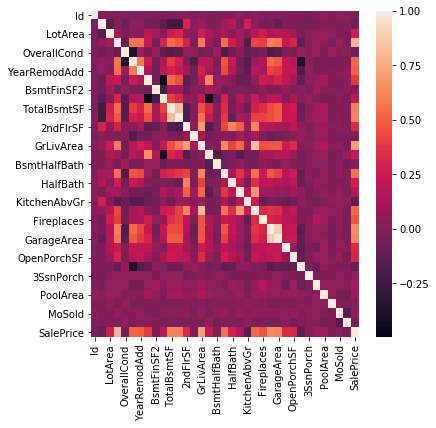

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(train.corr())

In [16]:
correlacion.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [17]:
# Your response here. 

X = sm.add_constant(train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]) 
# We must add the intercept using the add_constant function
Y = train['SalePrice']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:34:32   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187   

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:

#SalePrice = 1.97e+04*OverallQual + 51.0050*GrLivArea + 1.052e+04*GarageCars 
#            + 14.6329*GarageArea + 20.1053*TotalBsmtSF + 13.9811*lstFlrSF 
#            - 6626.9855*FullBath + 101.3379*TotRmsAbvGrd + 264.8001*YearBuilt 
#            + 292.5830*YearRemodAdd-1.173e+06

def SalePrice(OverallQual, GrLivArea, GarageCars, GarageArea,
       TotalBsmtSF, lstFlrSF, FullBath, TotRmsAbvGrd, YearBuilt,
       YearRemodAdd):
    return 1.97e+04*OverallQual + 51.0050*GrLivArea + 1.052e+04*GarageCars + 14.6329*GarageArea + 20.1053*TotalBsmtSF + 13.9811*lstFlrSF - 6626.9855*FullBath + 101.3379*TotRmsAbvGrd + 264.8001*YearBuilt + 292.5830*YearRemodAdd-1.173e+06

train_ajuste=train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]
train_ajuste['SalePrice_ajustado']=SalePrice(train_ajuste['OverallQual'],train_ajuste['GrLivArea'],train_ajuste['GarageCars'],
                                             train_ajuste['GarageArea'],train_ajuste['TotalBsmtSF'],train_ajuste['1stFlrSF'],
                                             train_ajuste['FullBath'], train_ajuste['TotRmsAbvGrd'],train_ajuste['YearBuilt'],
                                             train_ajuste['YearRemodAdd'])

train_ajuste.index = range(1,len(train_ajuste) + 1)
train_ajuste['Id']=train_ajuste.index
train_ajuste=train_ajuste[['Id', 'SalePrice_ajustado', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]
train_ajuste.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Id,SalePrice_ajustado,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
1,1,39797.2161,34900,4,720,0,0,720,720,1,4,1920,1950
2,2,9308.4017,35311,2,480,1,308,480,480,0,4,1949,1950
3,3,26210.7629,37900,3,968,0,0,600,600,1,6,1910,1950
4,4,-52181.1077,39300,1,334,0,0,0,334,1,2,1946,1950
5,5,82207.9675,40000,4,1317,1,250,649,649,1,6,1920,1950


In [40]:
train_ajuste.tail()

,Id,SalePrice_ajustado,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
1456,1456,354680.4317,582933,9,2822,3,1020,1734,1734,3,12,2008,2009
1457,1457,356267.4442,611657,9,2364,3,820,2330,2364,2,11,2009,2010
1458,1458,410170.7984,625000,10,3627,3,807,1930,1831,3,10,1995,1996
1459,1459,471304.7487,745000,10,4476,3,813,2396,2411,3,10,1996,1996
1460,1460,464026.2213,755000,10,4316,3,832,2444,2444,3,10,1994,1995


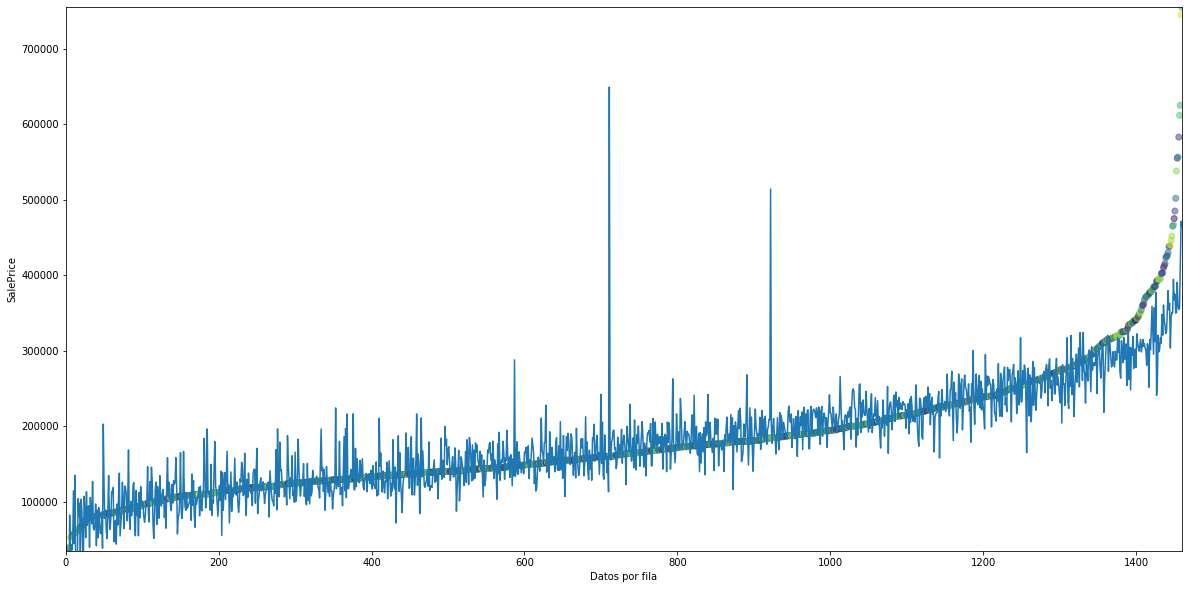

In [65]:
plt.figure(figsize=(20,10))
x1 = train_ajuste.index
plt.plot(x1,train_ajuste['SalePrice_ajustado'])

colors = np.random.rand(train_ajuste.shape[0])
plt.scatter(train_ajuste.index,train_ajuste.SalePrice, c=colors, alpha=0.5)
plt.xlabel('Datos por fila')
plt.ylabel('SalePrice')
plt.axis([0,train_ajuste.index.max(), train_ajuste.SalePrice.min(), train_ajuste.SalePrice.max()])

plt.show()

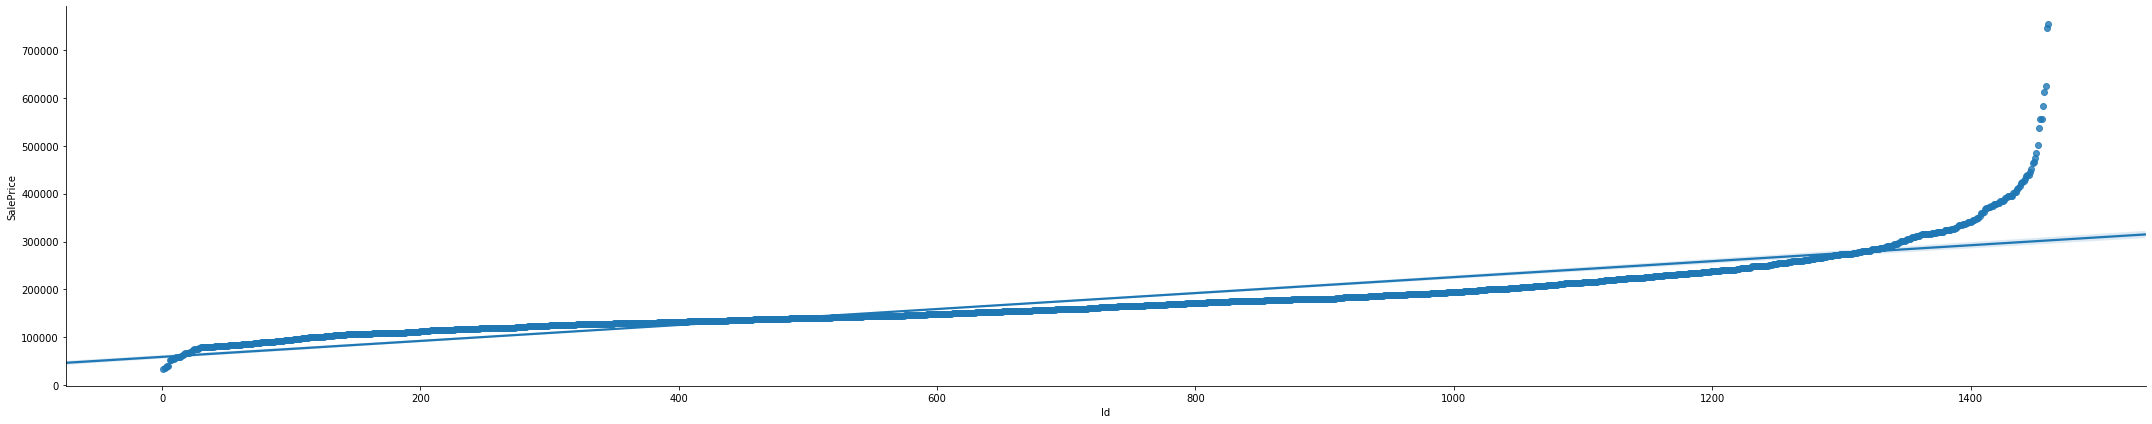

In [77]:
#La funcion axis recibe una lista con los valores [Xmin,Xmax,Ymin,Ymax]
sns.lmplot('Id', 'SalePrice', data=train_ajuste, fit_reg=True, order=1, palette="Set2", height=6, aspect=5)
plt.show()

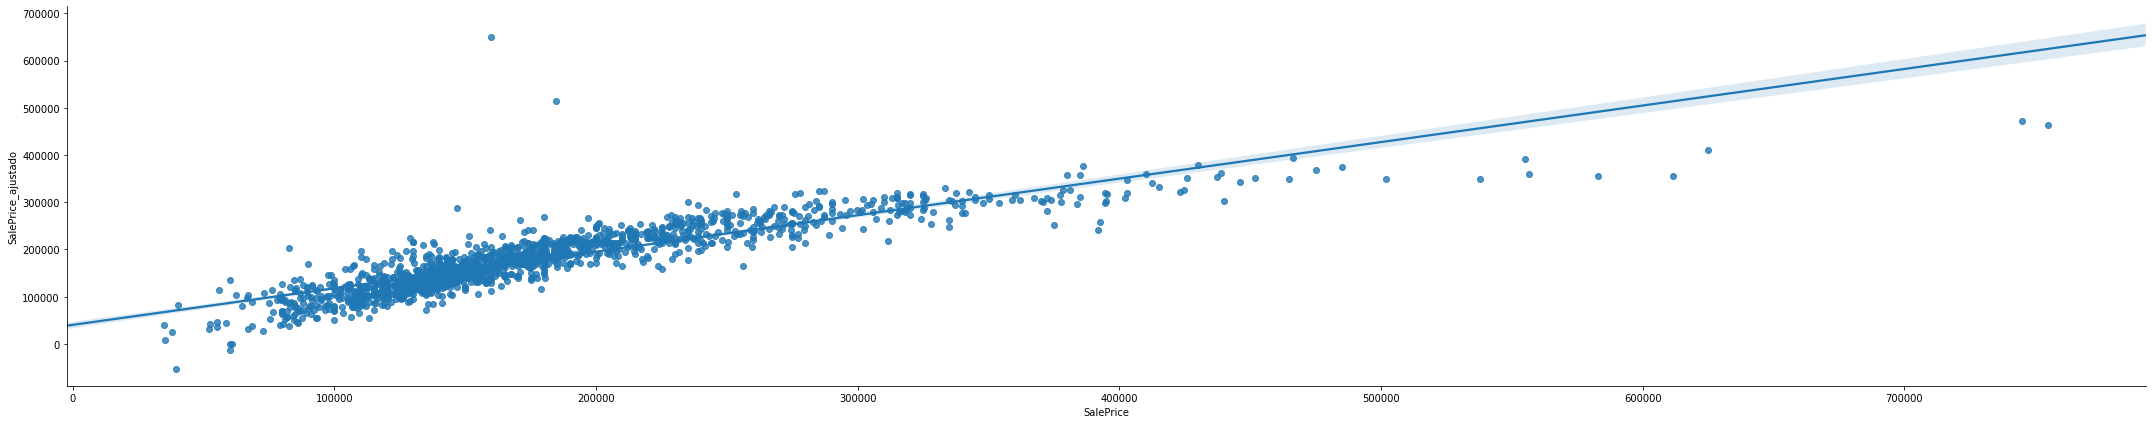

In [68]:
sns.lmplot('SalePrice', 'SalePrice_ajustado', data=train_ajuste, fit_reg=True, order=1, palette="Set2", height=6, aspect=5)
plt.show()

In [71]:
train_ajuste[['SalePrice', 'SalePrice_ajustado']].corr()

,SalePrice,SalePrice_ajustado
SalePrice,1.000000,0.879596
SalePrice_ajustado,0.879596,1.000000
